<a id='Title-Intermediate-NLP-RNN'></a>
<h1 style="color:SlateGray;">Intermediate NLP RNN</h1>

**Input dataset**

IMBD: a set of movie reviews with an adjustable limit on max word count.

**Output classification**

Binary categorization (positive/negative) of a movie review.

<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](01_Image_Classification.ipynb#Layers-Dense)

[*Embedding*](11_Word_Embeddings.ipynb#Layers-Embedding)

[*LSTM*](12_Basic_NLP_RNN.ipynb#Layers-LSTM)

[*Bidirectional*](13_Intermediate_Time_Series_RNN.ipynb#Layers-Bidirectional)

**Activations**

[*sigmoid*](02_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](01_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](02_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

An application of recurrent layers to a natural language processing (NLP) problem.

Using only the first 500 words in a review, a basic recurrent model is trained on reverse-ordered sentences and its performance is compared to that of a bidirectional model.


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words (among top max_features most common words)
maxlen = 500

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Reverse sequences
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 125s 6ms/step - loss: 0.4896 - acc: 0.7677 - val_loss: 0.4417 - val_acc: 0.8244
Epoch 2/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.3144 - acc: 0.8789 - val_loss: 0.3530 - val_acc: 0.8514
Epoch 3/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.2583 - acc: 0.9032 - val_loss: 0.3419 - val_acc: 0.8600
Epoch 4/10
20000/20000 [==============================] - 109s 5ms/step - loss: 0.2191 - acc: 0.9217 - val_loss: 0.3897 - val_acc: 0.8746
Epoch 5/10
20000/20000 [==============================] - 110s 5ms/step - loss: 0.1926 - acc: 0.9303 - val_loss: 0.4539 - val_acc: 0.8600
Epoch 6/10
20000/20000 [==============================] - 110s 5ms/step - loss: 0.1750 - acc: 0.9390 - val_loss: 0.3683 - val_acc: 0.8606
Epoch 7/10
20000/20000 [==============================] - 108s 5ms/step - loss: 0.1561 - acc: 0.9471 - val_loss: 0.4734 - v

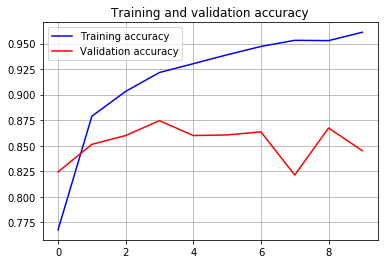

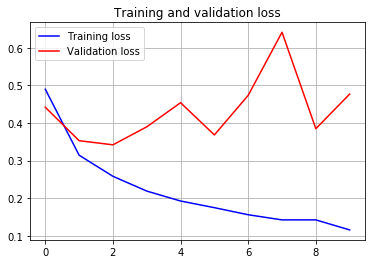

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

In [6]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 150s 6ms/step


[0.5794398148441314, 0.81932]

In [7]:
from keras import backend as K

K.clear_session()

model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 240s 12ms/step - loss: 0.5592 - acc: 0.7176 - val_loss: 0.4059 - val_acc: 0.8420
Epoch 2/10
20000/20000 [==============================] - 218s 11ms/step - loss: 0.3281 - acc: 0.8746 - val_loss: 0.3017 - val_acc: 0.8840
Epoch 3/10
20000/20000 [==============================] - 232s 12ms/step - loss: 0.2729 - acc: 0.9013 - val_loss: 0.3524 - val_acc: 0.8832
Epoch 4/10
20000/20000 [==============================] - 235s 12ms/step - loss: 0.2318 - acc: 0.9170 - val_loss: 0.3373 - val_acc: 0.8680
Epoch 5/10
20000/20000 [==============================] - 234s 12ms/step - loss: 0.2055 - acc: 0.9259 - val_loss: 0.3671 - val_acc: 0.8860
Epoch 6/10
20000/20000 [==============================] - 241s 12ms/step - loss: 0.1881 - acc: 0.9363 - val_loss: 0.4647 - val_acc: 0.8080
Epoch 7/10
20000/20000 [==============================] - 241s 12ms/step - loss: 0.1726 - acc: 0.9410 - val_loss: 0.3

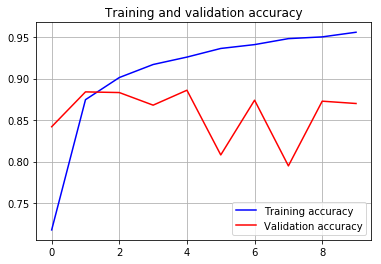

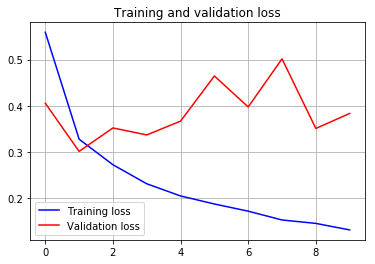

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.grid()
plt.show()

In [9]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 279s 11ms/step


[0.4575242032718658, 0.8432]